Use Random Forest to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"


In [2]:
"""
Created on 21 July 2020
@author: Shilpa Chavan
Algorithm : Random Forest
Dataset : Fraud_check.csv
"""
# Random Forest: Fraud check
import numpy as np
import pandas as pd # Pandas is used for data manipulation
import matplotlib.pyplot as plt
import seaborn as sns


# Importing Dataset

In [3]:
df = pd.read_csv("D:\\Shilpa\\Datascience\\Assignments\\RandomForest\\Fraud_check.csv")

# Step1 : Data Exploration

In [4]:
#view dimension of dataset
df.shape

(600, 6)

In [5]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [6]:
#Adding  a feature as fraud have values ("Risky","Good") based on Taxable Income values
fraud = []
for value in df["Taxable.Income"]:
    if value <= 30000:
        fraud.append("Risky")
    else :
        fraud.append("Good")
        
df["fraud"] = fraud


In [7]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,fraud
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [9]:
fraudCheck = df.drop(['Taxable.Income','City.Population'],axis =1)

In [10]:
fraudCheck

,Undergrad,Marital.Status,Work.Experience,Urban,fraud
0,NO,Single,10,YES,Good
1,YES,Divorced,18,YES,Good
2,NO,Married,30,YES,Good
3,YES,Single,15,YES,Good
4,NO,Married,28,NO,Good
...,...,...,...,...,...
595,YES,Divorced,7,YES,Good
596,YES,Divorced,2,YES,Good
597,NO,Divorced,0,YES,Good
598,YES,Married,17,NO,Good


In [11]:
#View summary of dataset
fraudCheck.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Work.Experience  600 non-null    int64 
 3   Urban            600 non-null    object
 4   fraud            600 non-null    object
dtypes: int64(1), object(4)
memory usage: 23.6+ KB


In [12]:
fraudCheck.columns

Index(['Undergrad', 'Marital.Status', 'Work.Experience', 'Urban', 'fraud'], dtype='object')

In [13]:
col_names = ['Undergrad','Marital.Status','Urban', 'fraud']

for col in col_names:
    print(fraudCheck[col].value_counts())

YES    312
NO     288
Name: Undergrad, dtype: int64
Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64
YES    302
NO     298
Name: Urban, dtype: int64
Good     476
Risky    124
Name: fraud, dtype: int64


In [14]:
#Checking null values in dataset
fraudCheck.isnull().sum()

Undergrad          0
Marital.Status     0
Work.Experience    0
Urban              0
fraud              0
dtype: int64

# Step 2: Feature Engineering

In [15]:
#Declare feature vector and target variable
x = fraudCheck.drop(['fraud'],axis =1)
y = fraudCheck['fraud']
#x
#y

In [16]:
#Displaying categorical variable
categorical = [col for col in x.columns if x[col].dtypes == 'O']
categorical

['Undergrad', 'Marital.Status', 'Urban']

In [17]:
numerical = [col for col in x.columns if x[col].dtypes != 'O']
numerical

['Work.Experience']

In [18]:
#Encoding categorical variable
#import category encoders

import category_encoders as ce

#encode varibles with ordinal encoding 
encoder= ce.OrdinalEncoder(cols=['Undergrad','Marital.Status','Urban'])
x1 = encoder.fit_transform(x)
x1

,Undergrad,Marital.Status,Work.Experience,Urban
0,1,1,10,1
1,2,2,18,1
2,1,3,30,1
3,2,1,15,1
4,1,3,28,2
...,...,...,...,...
595,2,2,7,1
596,2,2,2,1
597,1,2,0,1
598,2,3,17,2


In [19]:
#Feature Scaling
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
x1 = scaler.fit_transform(x1)
x2 = pd.DataFrame(x1, columns = ['Undergrad','Martial.Status','Work.Experience','Urban'])
x2

,Undergrad,Martial.Status,Work.Experience,Urban
0,-1.0,-0.5,-0.3125,0.0
1,0.0,0.0,0.1875,0.0
2,-1.0,0.5,0.9375,0.0
3,0.0,-0.5,0.0000,0.0
4,-1.0,0.5,0.8125,1.0
...,...,...,...,...
595,0.0,0.0,-0.5000,0.0
596,0.0,0.0,-0.8125,0.0
597,-1.0,0.0,-0.9375,0.0
598,0.0,0.5,0.1250,1.0


# Step3 : Model Building 

In [20]:
#Splitting the data into training and test data set
from sklearn.model_selection import train_test_split

x2_train,x2_test, y_train,y_test = train_test_split(x2, y, test_size = 0.33, random_state = 42 )
#x2_train
#x2_test
#y_train
#y_test

In [21]:
#Building Random forest model with default parameters
from sklearn.ensemble import RandomForestClassifier

#instantiate the classifier
rfc = RandomForestClassifier(random_state = 0)
rfc

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

# Step 4 : Model Training  and Model Evaluation

In [22]:
#fit the model
rfc.fit(x2_train, y_train)

#Predict test results
y_pred = rfc.predict(x2_test)
y_pred

#check accuracy score 
from sklearn.metrics import accuracy_score

print("Model accuracy score with 10 decision tree : {0:0.4f}".format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision tree : 0.6869


Here Random forest model is built with default parameter i.e n_estimators = 10.Now increasing the number of trees to check the effect on accuracy.

# Step 5 : Improving Model Performance 

In [23]:
#Building random forest with parameter n_estimators = 200
#instantiate the classifier with n_estimators = 200

rfcmodel = RandomForestClassifier(n_estimators = 200, random_state = 0)

#fit the model to training set
rfcmodel.fit(x2_train, y_train)

#predict the test set results
y_pred_200 = rfcmodel.predict(x2_test)

#checking the accuracy score
print("Model accuracy with 200 decision trees : {0:0.4f}".format(accuracy_score(y_test, y_pred_200)))


Model accuracy with 200 decision trees : 0.6869


Accuracy remains the same by increasing the number of decision trees to 200. 

# Step 6: Finding Important features

In [24]:
#creating classifier with n_estimators = 200
ifmodel = RandomForestClassifier(n_estimators = 200, random_state = 0)

#fit the model on training data
ifmodel.fit(x2_train, y_train)

ifmodel

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [25]:
#Using feature importance variable to see important features/Variables scores
feature_score = pd.Series(ifmodel.feature_importances_, index = x2_train.columns).sort_values(ascending = False)
feature_score

Work.Experience    0.771036
Martial.Status     0.108134
Urban              0.063995
Undergrad          0.056834
dtype: float64

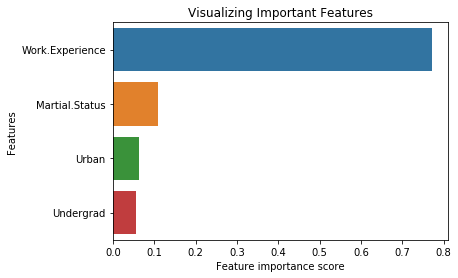

In [26]:
#Visualizing feature score with matplotlib and seaborn

sns.barplot(x = feature_score, y = feature_score.index)

#Adding labels to the graph
plt.xlabel("Feature importance score")
plt.ylabel("Features")

#Adding title to the graph
plt.title("Visualizing Important Features")

#Visualize graph
plt.show()

# Step 7: Building Random forest on important fetaures

In [27]:
#Dropping the least important feature 'Undergrad' and rebuilding the model
x_f = x2.drop(['Undergrad'], axis = 1)
y_f = fraudCheck['fraud']
x_f
y_f

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: fraud, Length: 600, dtype: object

In [28]:
#Splitting x_f and y_f into training & testing data
from sklearn.model_selection import train_test_split
x_f_train, x_f_test, y_f_train, y_f_test = train_test_split(x_f, y_f,test_size = 0.33, random_state = 42)
x_f_train
#x_f_test
#y_f_train
#y_f_test


,Martial.Status,Work.Experience,Urban
509,0.5,0.7500,0.0
149,-0.5,0.6250,1.0
124,0.0,-0.1250,1.0
428,0.5,0.5625,0.0
465,0.0,0.3750,1.0
...,...,...,...
71,-0.5,0.4375,1.0
106,-0.5,0.3125,0.0
270,0.5,-0.6250,1.0
435,0.0,-0.6875,0.0


In [29]:
#building the model and fit the model to training set with least important feature removed.
cmodel = RandomForestClassifier(n_estimators = 200, random_state = 0)

#fit the model to training set
cmodel.fit(x_f_train, y_f_train)

#predict the test set results
y_f_pred = cmodel.predict(x_f_test)

#checking the accuracy score
print("Model accuracy with 200 decision trees : {0:0.4f}".format(accuracy_score(y_f_test, y_f_pred)))


Model accuracy with 200 decision trees : 0.7121


With removal of least important fetaure 'Undergrad', model accuracy has increased a little bit.

Confusion Matix

 [[135  22]
 [ 35   6]]


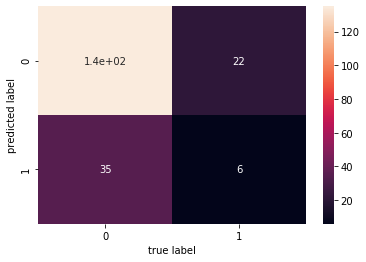

In [30]:
#Confusion Matrix
from sklearn.metrics  import confusion_matrix
cm = confusion_matrix(y_f_test, y_f_pred)
sns.heatmap(cm, annot=True)
print("Confusion Matix\n\n",cm)
plt.xlabel('true label')
plt.ylabel('predicted label');

# Step 8 : Classification Report 

In [31]:
#Classification report
from sklearn.metrics import classification_report

print(classification_report(y_f_test , y_f_pred))

              precision    recall  f1-score   support

        Good       0.79      0.86      0.83       157
       Risky       0.21      0.15      0.17        41

    accuracy                           0.71       198
   macro avg       0.50      0.50      0.50       198
weighted avg       0.67      0.71      0.69       198



# Step 9 : Visualizing a single decision tree from random forest


In [33]:
import os
from sklearn.tree import export_graphviz
import pydot
from sklearn import tree

# Installed graphviz using: conda install python-graphviz
# Solved FileNotFoundError: [WinError 2] the system cannot find the file specified.
estimator = cmodel.estimators_[5]
dot_data= export_graphviz(estimator, out_file=None, 
                feature_names = list(x_f_train.columns),
                proportion = False,filled=True, rounded=True,
                impurity=False)
graph = pydot.graph_from_dot_data(dot_data)
graph[0].write_pdf("randomforest.pdf")

#Visualizing a single tree
dot_data_single = export_graphviz(cmodel.estimators_[0], out_file=None, 
                feature_names = list(x_f_train.columns),
                proportion = False,filled=True, rounded=True,
                impurity=False,max_depth=3)
graph_single = pydot.graph_from_dot_data(dot_data_single)
graph_single[0].write_png('singletree.png')